In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [64]:
df.shape

(205, 26)

In [65]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

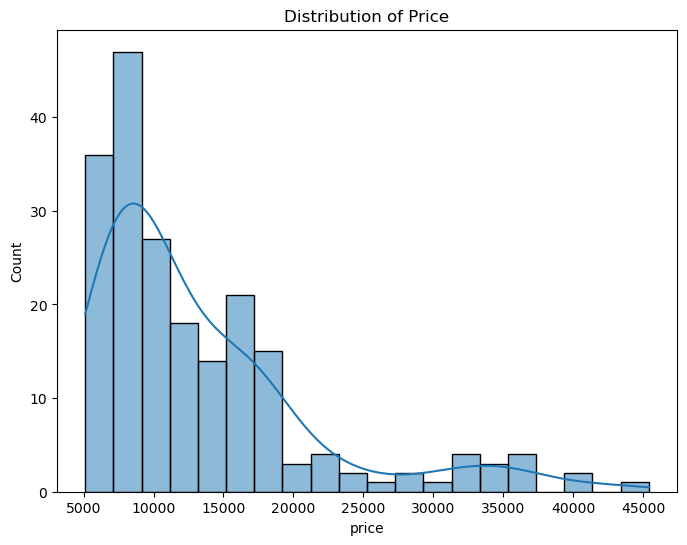

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

In [67]:
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)
avg_prices_by_car

CarName
buick regal sport coupe (turbo)    45400.0
bmw x5                             41315.0
buick century special              40960.0
porsche boxter                     37028.0
jaguar xk                          36000.0
                                    ...   
Nissan versa                        5499.0
mitsubishi mirage                   5389.0
toyota corona mark ii               5348.0
maxda rx3                           5195.0
chevrolet impala                    5151.0
Name: price, Length: 147, dtype: float64

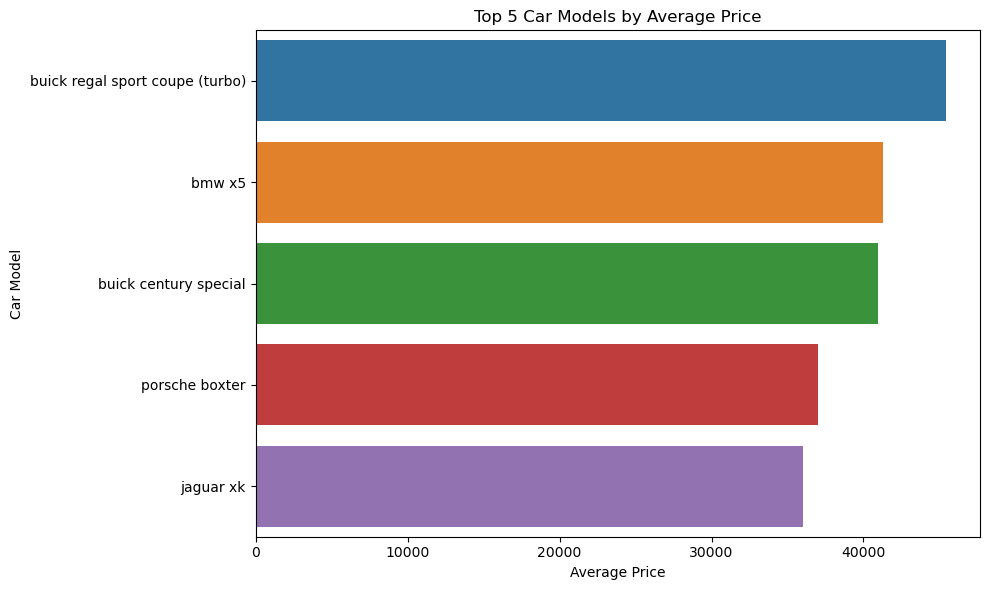

In [97]:
n = 5 
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

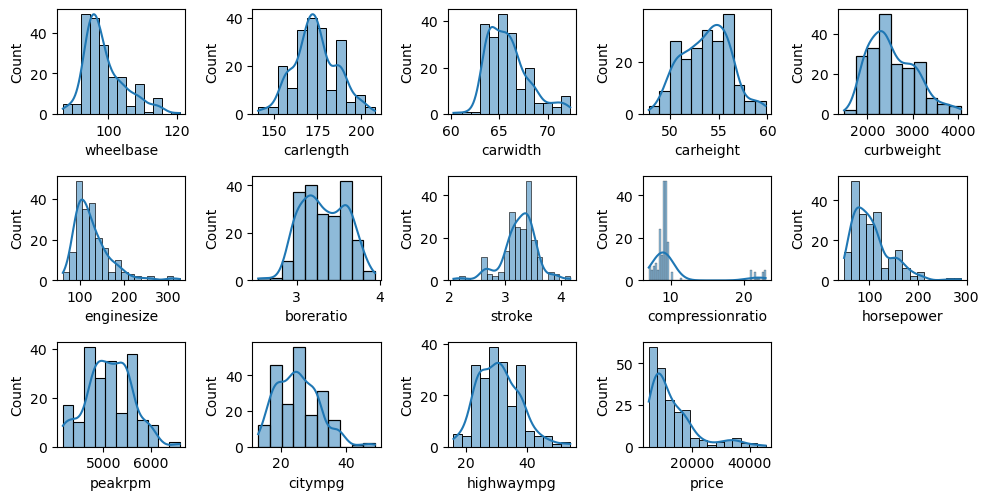

In [79]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']
plt.figure(figsize=(10,8)) 
for i in numerical_features:
    plt.subplot(5, 5, numerical_features.index(i) + 1)
    sns.histplot(df[i],kde=True)
plt.tight_layout()

In [88]:
from sklearn.preprocessing import LabelEncoder
list=["CarName","fueltype","aspiration","doornumber","carbody","drivewheel",
                     "enginelocation","enginetype","cylindernumber","fuelsystem"]
le=LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i])

In [89]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [102]:
x=df.iloc[:,:20:]
x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15
201,202,-1,138,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15
202,203,-1,140,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87
203,204,-1,142,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40


In [103]:
y=df.iloc[:,25:]
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [147]:
from sklearn.metrics import r2_score
def scores(y_test,y_pred1):
    
    r2 = r2_score(y_test, y_pred1)
   
    print("R2 Score (Accuracy): {:.2f}%".format(r2 * 100))

In [148]:
scores(y_test,y_pred1)

R2 Score (Accuracy): 66.19%


In [149]:
model2=DecisionTreeRegressor()
model2

DecisionTreeRegressor()

In [150]:
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [151]:
scores(y_test,y_pred2)

R2 Score (Accuracy): 57.02%


In [152]:
model3=RandomForestRegressor()
model3

RandomForestRegressor()

In [153]:
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

C:\Users\User\AppData\Local\Temp\ipykernel_12900\3666696360.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train,y_train)


In [154]:
scores(y_test,y_pred3)

R2 Score (Accuracy): 76.94%


In [157]:
features = [0.6, 0.006849, 1.0, 0.0, 1.0, 0.50, 1.0, 0.0, 0.230321, 0.433333, 0.383333, 0.833333, 0.500000, 0.343396, 0.714286, 0.100000, 0.666667, 0.1250,	0.441667, 0.346939]
car_price = model3.predict([features])
print("Predicted Price: $ {:.2f}".format(car_price[0]))

Predicted Price: $ 8993.00


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
